In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install keras_core keras_nlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.1/644.1 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 99.0 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
ERROR: pip's dependency resolver 

In [ ]:
import pandas as pd
import string
import csv
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import keras_core as keras
import keras_nlp
from tensorflow import keras

Using TensorFlow backend


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Multi/multilingual_train_new.csv')
dev = pd.read_csv('/content/drive/MyDrive/Multi/multilingual_dev_new.csv')

In [ ]:
train

,text,label
0,This report summarizes the findings of the US ...,1
1,I've been standing here for days now. Watching...,0
2,"Towell, 25, was knocked down twice during the ...",1
3,我不确定你想要问的是什么，但是阿玛尼是一个奢侈品牌，它的产品包括化妆品、香水和时装。黑手党是...,1
4,"Sometimes when we eat certain types of food, o...",1
...,...,...
199995,"That wouldn't be a normal headache, IMHO. It'd...",0
199996,The phenomenon of flies constantly colliding w...,1
199997,These don't have to be keywords--you just need...,0
199998,"many ways , one is to build the tunnel in piec...",0


In [ ]:
dev

,text,label
0,The United Nations declared war has been illeg...,1
1,Horse bones are incredibly dense and under a m...,0
2,Balls originally form in the abdomen . And eve...,0
3,Несъгласие с предложенията на служебния минист...,0
4,Temujin began his ascent to power by offering ...,1
...,...,...
85710,I heard that the fabricators that Intel uses t...,0
85711,Because some people wonder why others edit or ...,0
85712,Apply conditioner to your hair. Start at the t...,1
85713,Not bad! Not bad at all. Pretty expensive coff...,0


In [ ]:
# train = train.sample(frac=0.5, random_state=42).reset_index(drop=True)
dev = dev.sample(frac=0.5, random_state=42).reset_index(drop=True)

# Check the number of rows to confirm
print(f"Train data: {train.shape[0]} rows")
print(f"Dev data: {dev.shape[0]} rows")

Train data: 100000 rows
Dev data: 42858 rows


In [ ]:
train

,text,label
0,Charles François de Rouvroy (1723-1797) was a ...,1
1,首先。楼主，千万别相信什么“报应”一说。所谓的报应，都是受害者自欺欺人的心理安慰，除了麻痹自...,0
2,"I 'm pretty sure that biologically , pubic hai...",0
3,The practice of using dogs and other animals a...,0
4,"So, I hope this CMV is not to specific for thi...",1
...,...,...
99995,"T-minus 10 minutes"" a robotic female voice sai...",1
99996,Distance education is an alternative form of i...,1
99997,The Chesterfield striker was cleared of rape a...,1
99998,Building construction is the process of adding...,1


In [ ]:
dev

,text,label
0,We present a Keck/DEIMOS spectroscopic survey ...,1
1,Słowiec [ˈswɔjɛt͡s] (German:[ˈzɔvɛç]) is a vil...,1
2,Eating cheaply at a fast food restaurant can b...,1
3,This study investigates the role of stars in g...,1
4,The Concorde was a magnificent supersonic jet ...,1
...,...,...
42853,Power flow analysis plays a fundamental and cr...,0
42854,诉讼书应当包括以下几个方面：\n\n一、诉讼请求：\n\n本人请求法院判令被告立即修复漏水处...,1
42855,The multifaceted nature of modeling air pollut...,1
42856,The leading naturalist in Britain was the anat...,0


In [ ]:
# train['lang'].value_counts()

In [ ]:
dev['lang'].value_counts()

In [ ]:
train = train.drop(columns=['id', 'lang'])

In [ ]:
dev = dev.drop(columns=['id', 'lang'])

In [ ]:
train

,text,label
0,Grammar are the rules around which a language ...,0
1,The sound of fighting and saxophone echoed dow...,1
2,If someone with whom you are not in a relation...,0
3,"I used to be a hardcore bemani player, always ...",0
4,This paper presents a detailed analysis of the...,1
...,...,...
299995,This is my 2nd favorite hamburger place I have...,1
299996,It is great to see a film starring kids whose ...,0
299997,"Because soap is soft, and when you run your fi...",1
299998,"In ring theory, the notion of number is genera...",1


In [ ]:
dev

,text,label
0,Pizza was delivered in a timely fashion but it...,0
1,"Mom, Jane and I want to know who you're going ...",0
2,Is there any species in particular you are ref...,0
3,The selection of features that are relevant fo...,0
4,"ninja edit: I read ""paradise"" not ""parasite."" ...",1
...,...,...
99995,"This is an incredibly simplified version , but...",0
99996,"The rest of the world stands on "" popular opin...",0
99997,The wikipedia article] (URL0) basically says t...,1
99998,"First off, let me clarify that the World Healt...",1


In [ ]:
import pandas as pd

# Check if there are any NaN values in X_train or X_test
has_nan_in_train = train['text'].isnull().values.any()
has_nan_in_test = dev['text'].isnull().values.any()

print(f"Are there any NaN values in X_train? {has_nan_in_train}")
print(f"Are there any NaN values in X_test? {has_nan_in_test}")


Are there any NaN values in X_train? False
Are there any NaN values in X_test? False


In [ ]:
nan_count_in_train = train['text'].isnull().sum()
nan_count_in_dev = dev['text'].isnull().sum()

print("NaN counts in train:")
print(nan_count_in_train)
print("NaN counts in dev:")
print(nan_count_in_dev)


NaN counts in train:
0
NaN counts in dev:
0


In [ ]:
nan_rows_in_train = train[train['text'].isnull()]
nan_rows_in_dev = dev[dev['text'].isnull()]

print("Rows with NaN values in 'text' column of train:")
print(nan_rows_in_train)

print("Rows with NaN values in 'text' column of dev:")
print(nan_rows_in_dev)

Rows with NaN values in 'text' column of train:
Empty DataFrame
Columns: [text, label]
Index: []
Rows with NaN values in 'text' column of dev:
Empty DataFrame
Columns: [text, label]
Index: []


In [ ]:
train['text'].fillna("No Text", inplace=True)
dev['text'].fillna("No Text", inplace=True)

print("NaN values in 'text' column replaced with 'No Text' in train and dev datasets.")

NaN values in 'text' column replaced with 'No Text' in train and dev datasets.


<ipython-input-19-cadc45ed1bd4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['text'].fillna("No Text", inplace=True)
<ipython-input-19-cadc45ed1bd4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [ ]:
nan_rows_in_train = train[train['text'].isnull()]
nan_rows_in_dev = dev[dev['text'].isnull()]

print("Rows with NaN values in 'text' column of train:")
print(nan_rows_in_train)

print("Rows with NaN values in 'text' column of dev:")
print(nan_rows_in_dev)

Rows with NaN values in 'text' column of train:
Empty DataFrame
Columns: [text, label]
Index: []
Rows with NaN values in 'text' column of dev:
Empty DataFrame
Columns: [text, label]
Index: []


In [ ]:
nan_count_in_train = train['text'].isnull().sum()
nan_count_in_dev = dev['text'].isnull().sum()

print("NaN counts in train:")
print(nan_count_in_train)
print("NaN counts in dev:")
print(nan_count_in_dev)


NaN counts in train:
0
NaN counts in dev:
0


In [ ]:
train['text_length'] = train['text'].apply(lambda x : len(x.split()))

Text(0.5, 0.98, 'Distribution of the length per text - Train dataset')

<Figure size 4000x5000 with 0 Axes>

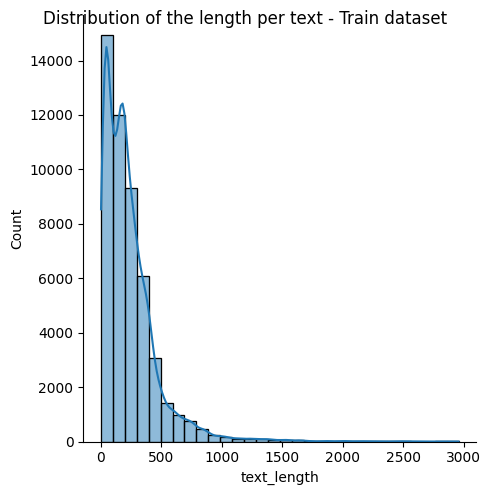

In [ ]:
fig = plt.figure(figsize=(40,50))
plot = sns.displot(data=train, x="text_length", bins=30, kde=True)
plot.fig.suptitle("Distribution of the length per text - Train dataset")

In [ ]:
train["text_length"].mean(), train["text_length"].std()

(236.60786728043877, 235.80465637022732)

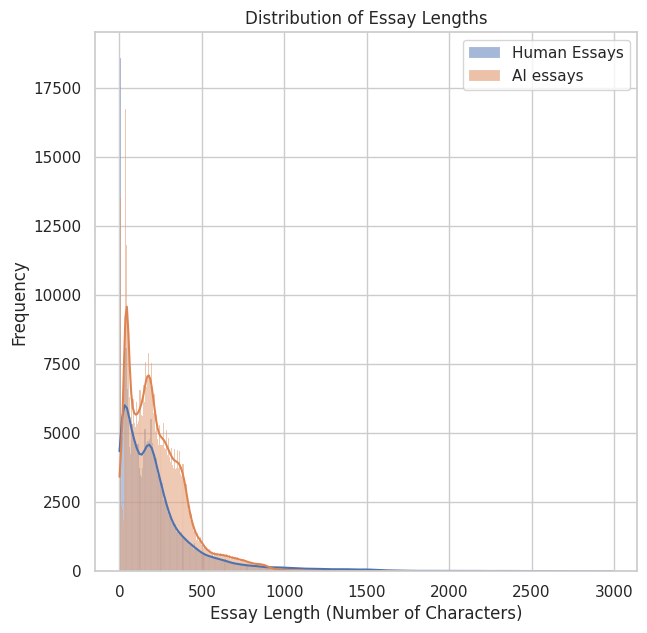

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(7, 7))

sns.histplot(data=train[train["label"] == 0]["text_length"], label = "Human Essays", kde = True)
sns.histplot(data=train[train["label"] == 1]["text_length"], label = "AI essays", kde = True)

plt.title('Distribution of Essay Lengths')
plt.xlabel('Essay Length (Number of Characters)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
def create_text_metrics(text):
    word_count = len(text.split())
    sentence_count = len(text.split('.'))
    unique_word_count = len(set(text.split()))
    return word_count, sentence_count, unique_word_count

train['metrics'] = train['text'].apply( create_text_metrics)
train[['word_count', 'sentence_count', 'unique_word_count']] = pd.DataFrame(train['metrics'].tolist(), index = train.index)
train.drop('metrics', axis=1, inplace=True)

comparison_metrics = train.groupby('label')[['word_count',  'sentence_count', 'unique_word_count']].mean()
comparison_metrics

,word_count,sentence_count,unique_word_count
label,,,
0,244.010507,14.923314,139.706430
1,230.561581,14.273923,134.082669


In [ ]:
train

,text,label,text_length
0,This report summarizes the findings of the US ...,1,167
1,I've been standing here for days now. Watching...,0,229
2,"Towell, 25, was knocked down twice during the ...",1,48
3,我不确定你想要问的是什么，但是阿玛尼是一个奢侈品牌，它的产品包括化妆品、香水和时装。黑手党是...,1,1
4,"Sometimes when we eat certain types of food, o...",1,96
...,...,...,...
674078,"Okay, so like, galaxies and supermassive black...",1,237
674079,"When individuals face tough decisions, the sta...",1,542
674080,"Ekrem Bora (born 3 September 1983), better kno...",0,402
674081,Warner Bros. will release every single one of ...,0,124


In [ ]:
import keras_nlp
import keras

# Set the sequence length
SEQ_LENGTH = 512

# Use the available preset for XLM-RoBERTa
preprocessor = keras_nlp.models.XLMRobertaPreprocessor.from_preset(
    "xlm_roberta_base_multi",  # Use the correct preset identifier
    sequence_length=SEQ_LENGTH,
)

# Pretrained classifier using the multi-language XLM-RoBERTa
classifier = keras_nlp.models.XLMRobertaClassifier.from_preset(
    "xlm_roberta_base_multi",  # Use the correct preset identifier
    num_classes=2,
    activation=None,
    preprocessor=preprocessor,
)

# Re-compile (e.g., with a new learning rate)
classifier.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(5e-4),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy()
    ]
)

# Access backbone programmatically (e.g., to change `trainable`).
classifier.backbone.trainable = False

# Print the model summary
classifier.summary()


100%|██████████| 517/517 [00:00<00:00, 328kB/s]


100%|██████████| 429/429 [00:00<00:00, 500kB/s]


100%|██████████| 4.83M/4.83M [00:00<00:00, 9.08MB/s]


100%|██████████| 1.03G/1.03G [00:24<00:00, 46.0MB/s]


Preprocessor: "xlm_roberta_text_classifier_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ xlm_roberta_tokenizer (XLMRobertaTokenizer)                   │                      Vocab size: 250,002 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "xlm_roberta_text_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ xlm_roberta_backbone          │ (None, None, 768)         │     277,450,752 │ padding_mask[0][0],        │
│ (XLMRobertaBackbone)          │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item (GetItem)            │ (None, 768)               │               0 │ xlm_roberta_backbone[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pooled_dropout (Dropout)      │ (None, 768)               │               0 │ get_item[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pooled_dense (Dense)          │ (None, 768)               │         590,592 │ pooled_dropout[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output_dropout (Dropout)      │ (None, 768)               │               0 │ pooled_dense[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │           1,538 │ output_dropout[0][0]       │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 278,042,882 (1.04 GB)

 Trainable params: 592,130 (2.26 MB)

 Non-trainable params: 277,450,752 (1.03 GB)

In [ ]:
X_train = train["text"]
X_test = dev["text"]
y_train = train["label"]
y_test = dev["label"]

In [ ]:
# Fit
classifier.fit(x=X_train,
               y=y_train,
               validation_data=(X_test, y_test),
               epochs=1,
               batch_size=128
              )

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9266s 6s/step - loss: 0.5068 - sparse_categorical_accuracy: 0.7406 - val_loss: 0.4779 - val_sparse_categorical_accuracy: 0.7431


In [ ]:
def displayConfusionMatrix(y_true, y_pred, dataset):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        np.argmax(y_pred, axis=1),
        display_labels=["Human","AI"],
        cmap=plt.cm.Blues
    )

    tn, fp, fn, tp = confusion_matrix(y_true, np.argmax(y_pred, axis=1)).ravel()
    f1_score = tp / (tp+((fn+fp)/2))

    disp.ax_.set_title("Confusion Matrix on " + dataset + " Dataset -- F1 Score: " + str(f1_score.round(2)))

In [ ]:
classifier.save("model_xlmroberta_multi.keras")

NameError: name 'classifier' is not defined

In [ ]:
y_pred_test = classifier.predict(X_test)

1248/3125 ━━━━━━━━━━━━━━━━━━━━ 29:12 934ms/step

In [ ]:
y_pred_test

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
displayConfusionMatrix(y_test, y_pred_test,  "Test")

In [ ]:
devtest = pd.read_csv('/content/drive/MyDrive/Multi/multilingual_devtest.csv')
devtest

In [ ]:
devtest = devtest.drop(columns=['lang'])
devtest

In [ ]:
devtest_new = devtest["text"]
devtest_new

In [ ]:
devtest_pred = classifier.predict(devtest_new)

In [ ]:
probabilities = tf.nn.softmax(devtest_pred).numpy()
probabilities

In [ ]:
predicted_classes = np.argmax(probabilities, axis=1)
predicted_classes

In [ ]:
devtest['label'] = predicted_classes
devtest

In [ ]:
devtest_new = devtest[['id', 'label']]
devtest_new

In [ ]:
devtest_new['label'].value_counts()

In [ ]:
devtest_new.to_csv('subtask_b.csv', index=False)

In [ ]:
devtest_new.to_csv('subtask_b.tsv', sep='\t' index=False)

In [ ]:
import pandas as pd
import json

csv_file = 'subtask_b.csv'
df = pd.read_csv(csv_file)

jsonl_file = 'subtask_b.jsonl'
with open(jsonl_file, 'w') as f:
    for record in df.to_dict(orient='records'):
        f.write(json.dumps(record) + '\n')

print("CSV has been converted to JSONL format.")
